<a href="https://colab.research.google.com/github/Zurezh/Python_LearnByDoing/blob/master/Module_6_Advanced_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 6 - Advanced Visualization

1. Category Data Type
2. JointPlots
3. Histograms
4. Staked Histograms
5. KDE Plot
6. Subplots()
7. Violinplots vs Boxplots
8. Faced Grid
9. Coordinates and Diagonals
10. Building Dashboard in Python
11. Styling Tips
12. Finishing Touches
13. Exercise

## Category Datatype

In [0]:
import pandas as pd

In [0]:
movies = pd.read_csv('https://raw.githubusercontent.com/Zurezh/Python_LearnByDoing/master/P4-Movie-Ratings.csv')

In [3]:
len(movies)

559

In [5]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [6]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [0]:
# Renaming Columns
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating',
       'BudgetMillions', 'Year']

In [8]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null object
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [10]:
movies.describe()
# Year is more of category rather than a number
# In reality, Mean and Std of Year doesn't make sense

,CriticRating,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [0]:
# Change the column in category data
movies.Film = movies.Film.astype('category')

In [12]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null int64
dtypes: category(1), int64(4), object(1)
memory usage: 47.4+ KB


In [0]:
# Change the column in category data
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

In [14]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [15]:
# Quick way to find unique values for categories
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [17]:
movies.describe()
# Year is not displayed as we changed to the Category Data

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


## JointPlots

In [0]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

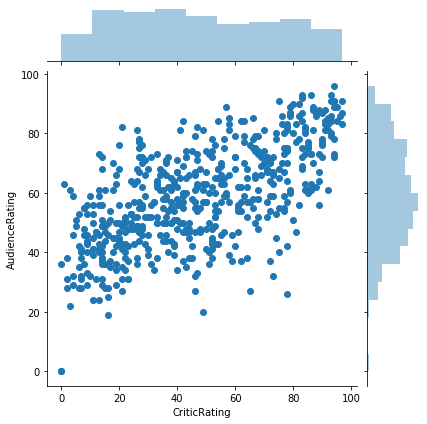

In [22]:
# JointPlots
j = sns.jointplot(data = movies, x = 'CriticRating',y = 'AudienceRating')

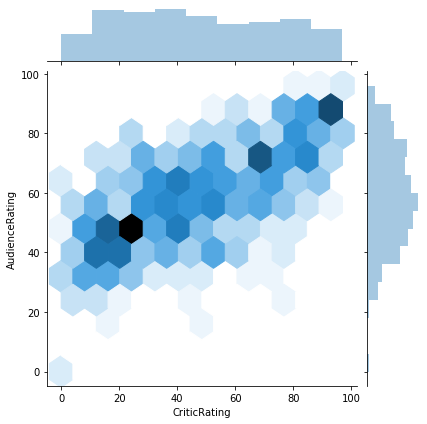

In [23]:
# Adding few parameters
j = sns.jointplot(data = movies, x = 'CriticRating',y = 'AudienceRating', kind='hex')

In [0]:
# Chart 1


## Histograms

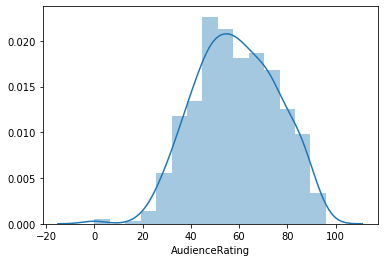

In [25]:
# Using Seaborn
m1 = sns.distplot(movies.AudienceRating,bins=15)

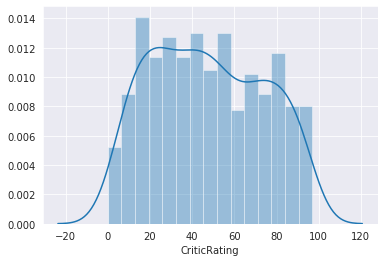

In [31]:
m2 = sns.distplot(movies.CriticRating,bins=15)

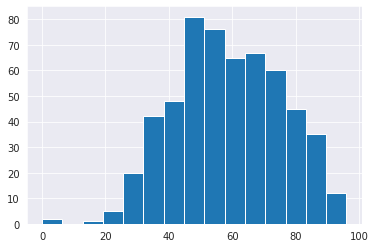

In [30]:
# Using Pyplot
sns.set_style('darkgrid') # sns.set_style('white')
n1 = plt.hist(movies.AudienceRating,bins=15)

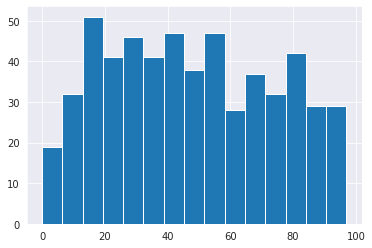

In [33]:
n2 = plt.hist(movies.CriticRating,bins=15)

## Staked Histograms

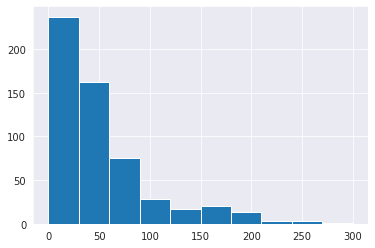

In [35]:
plt.hist(movies.BudgetMillions)
plt.show()

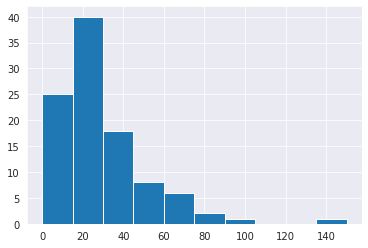

In [37]:
# Filter the dataset
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions)
plt.show()

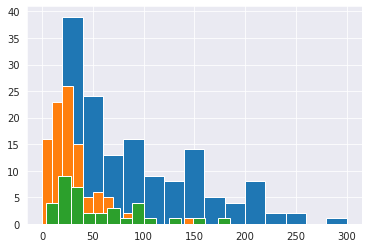

In [39]:
# Filter the dataset
plt.hist(movies[movies.Genre == 'Action'].BudgetMillions, bins=15)
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions, bins = 15)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions, bins = 15)
plt.show()

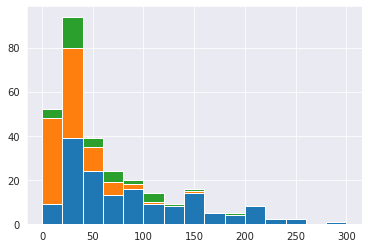

In [49]:
# Stake the histogram
plt.hist([movies[movies.Genre == 'Action'].BudgetMillions, \
          movies[movies.Genre == 'Drama'].BudgetMillions, \
          movies[movies.Genre == 'Thriller'].BudgetMillions], \
         bins = 15, stacked = True)
plt.show()

In [51]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [52]:
# Optimized for Genres
for gen in movies.Genre.cat.categories:
  print(gen)

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


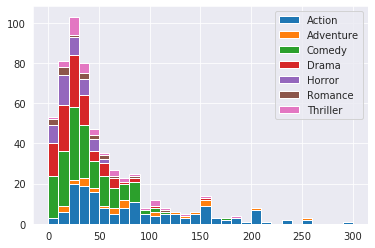

In [57]:
# Optimized for Genres

list1 = []
myLabels = []

for gen in movies.Genre.cat.categories:
  list1.append(movies[movies.Genre == gen].BudgetMillions)
  myLabels.append(gen)

h = plt.hist(list1,bins=30,stacked=True,rwidth=1,label=myLabels)
plt.legend()
plt.show()

## KDE Plot

In [0]:
# Kernel Density Estimate Plot

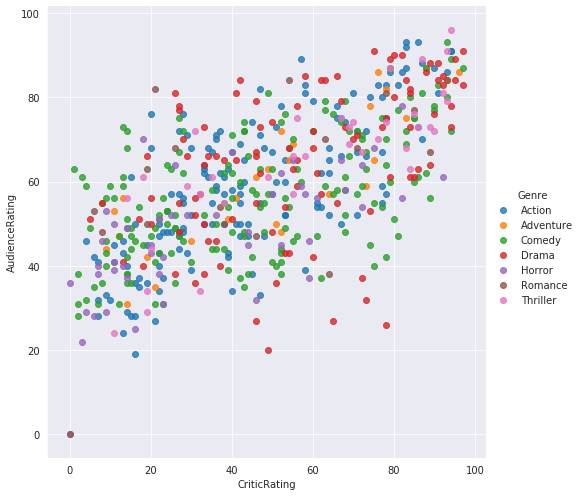

In [62]:
vis1 = sns.lmplot(data=movies,x='CriticRating',y='AudienceRating',\
                  fit_reg=False,hue='Genre', \
                  size=7,aspect = 1)

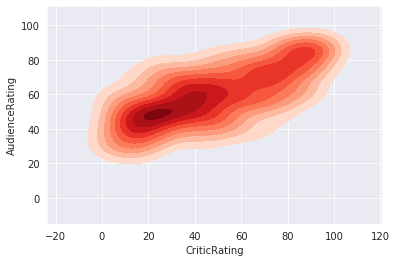

In [70]:
k1 = sns.kdeplot(movies.CriticRating,movies.AudienceRating, \
                 shade = True,shade_lowest=False,cmap = 'Reds')

#Tip:
#k1b = sns.kdeplot(movies.CriticRating,movies.AudienceRating, cmap = 'Reds')

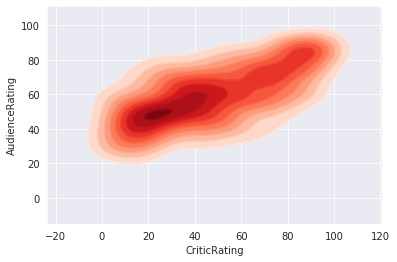

In [71]:
k1 = sns.kdeplot(movies.CriticRating,movies.AudienceRating, \
                 shade = True,shade_lowest=False,cmap = 'Reds')

#Tip:
k1b = sns.kdeplot(movies.CriticRating,movies.AudienceRating, cmap = 'Reds')

## Working with Subplots

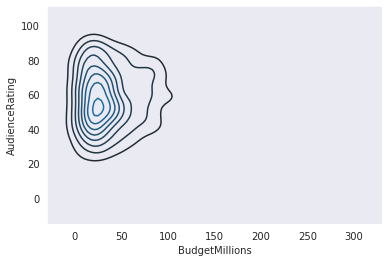

In [73]:
sns.set_style('dark')
k1 = sns.kdeplot(movies.BudgetMillions,movies.AudienceRating)

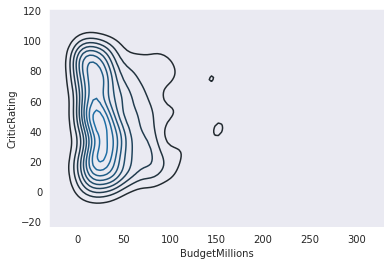

In [74]:
k2 = sns.kdeplot(movies.BudgetMillions,movies.CriticRating)

[(-20, 160)]

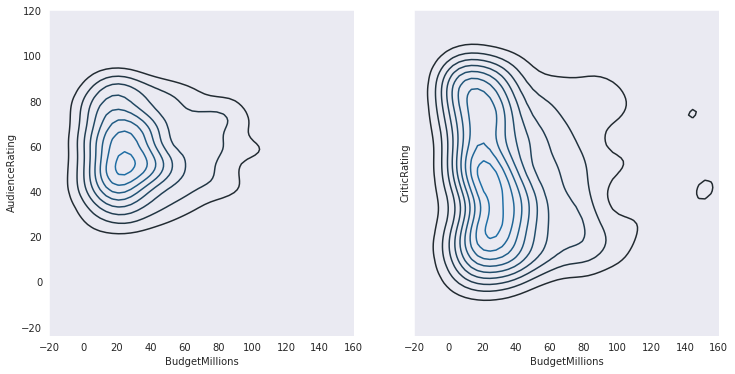

In [81]:
f, axes = plt.subplots(1,2,figsize=(12,6), sharex = True, sharey=True)
k1 = sns.kdeplot(movies.BudgetMillions,movies.AudienceRating,ax=axes[0])
k2 = sns.kdeplot(movies.BudgetMillions,movies.CriticRating,ax=axes[1])
k1.set(xlim=(-20,160))

## ViolinPlots vs BoxPlots

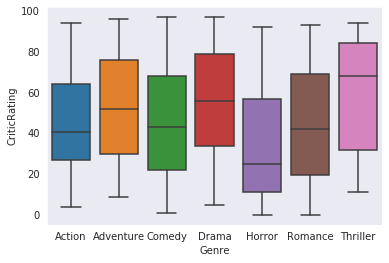

In [84]:
# BoxPlot
z = sns.boxplot(data=movies,x='Genre',y='CriticRating')

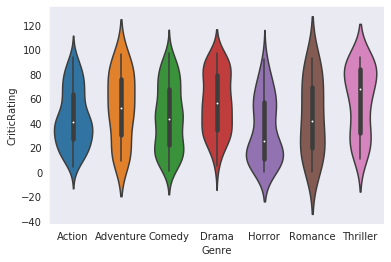

In [83]:
# ViolinPlots
z = sns.violinplot(data=movies,x='Genre',y='CriticRating')

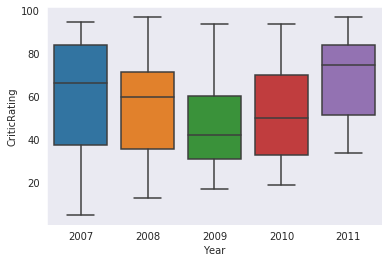

In [86]:
z = sns.boxplot(data=movies[movies.Genre=='Drama'],x='Year',y='CriticRating')

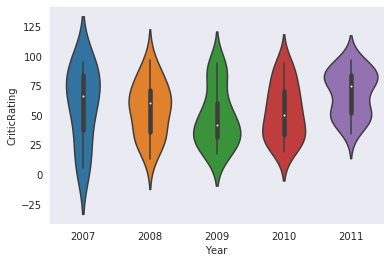

In [87]:
z = sns.violinplot(data=movies[movies.Genre=='Drama'],x='Year',y='CriticRating')

## Facet Grids

In [0]:
#g = sns.FacetGrid(movies,row='Genre',hue='Genre')
g = sns.FacetGrid(movies,row='Genre',col='Year',hue='Genre')

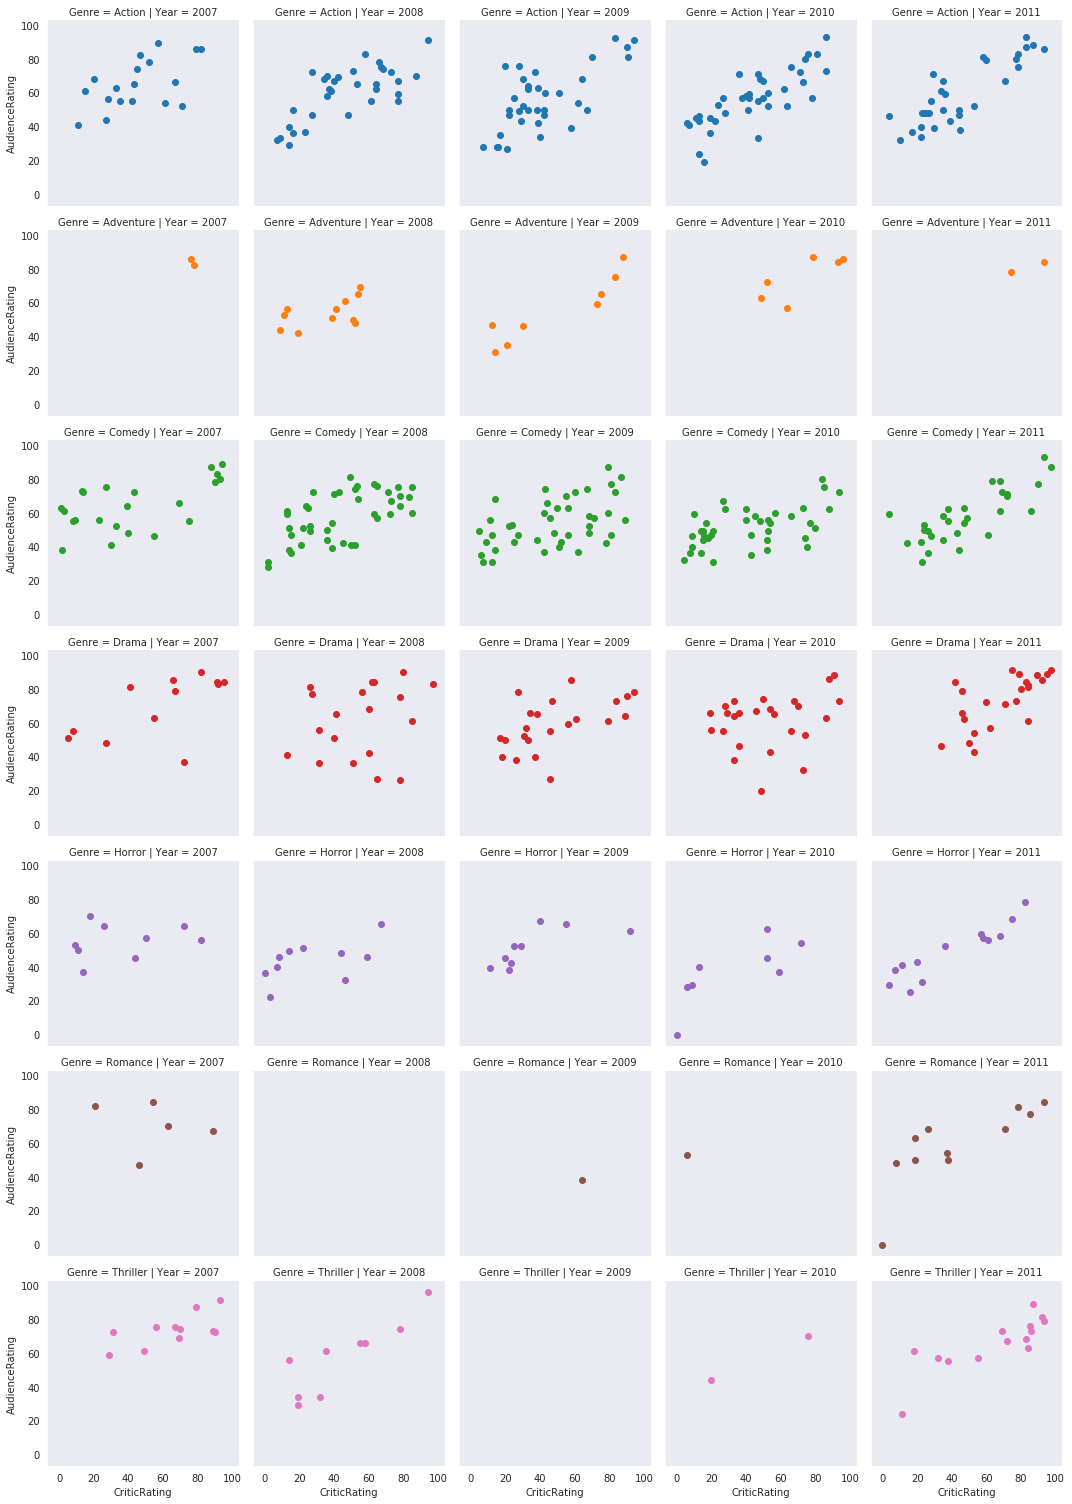

In [92]:
g = sns.FacetGrid(movies,row='Genre',col='Year',hue='Genre')
g = g.map(plt.scatter,'CriticRating','AudienceRating')

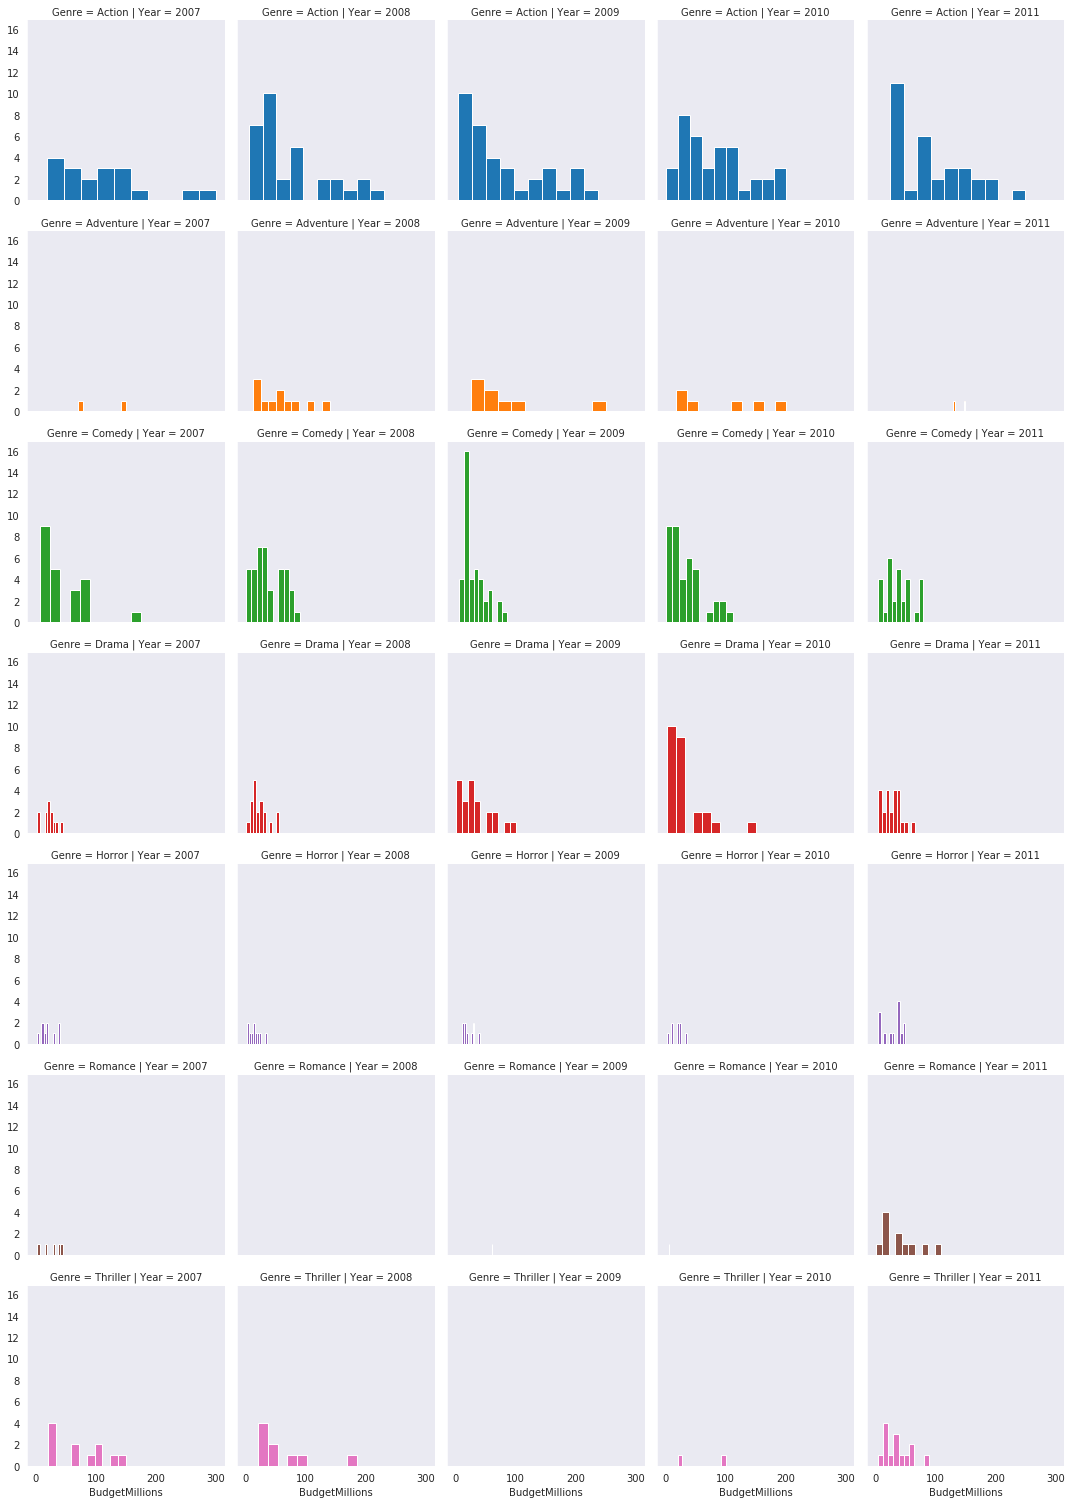

In [94]:
# can populate with any type of chart: Example Histogram
g = sns.FacetGrid(movies,row='Genre',col='Year',hue='Genre')
g = g.map(plt.hist,'BudgetMillions')

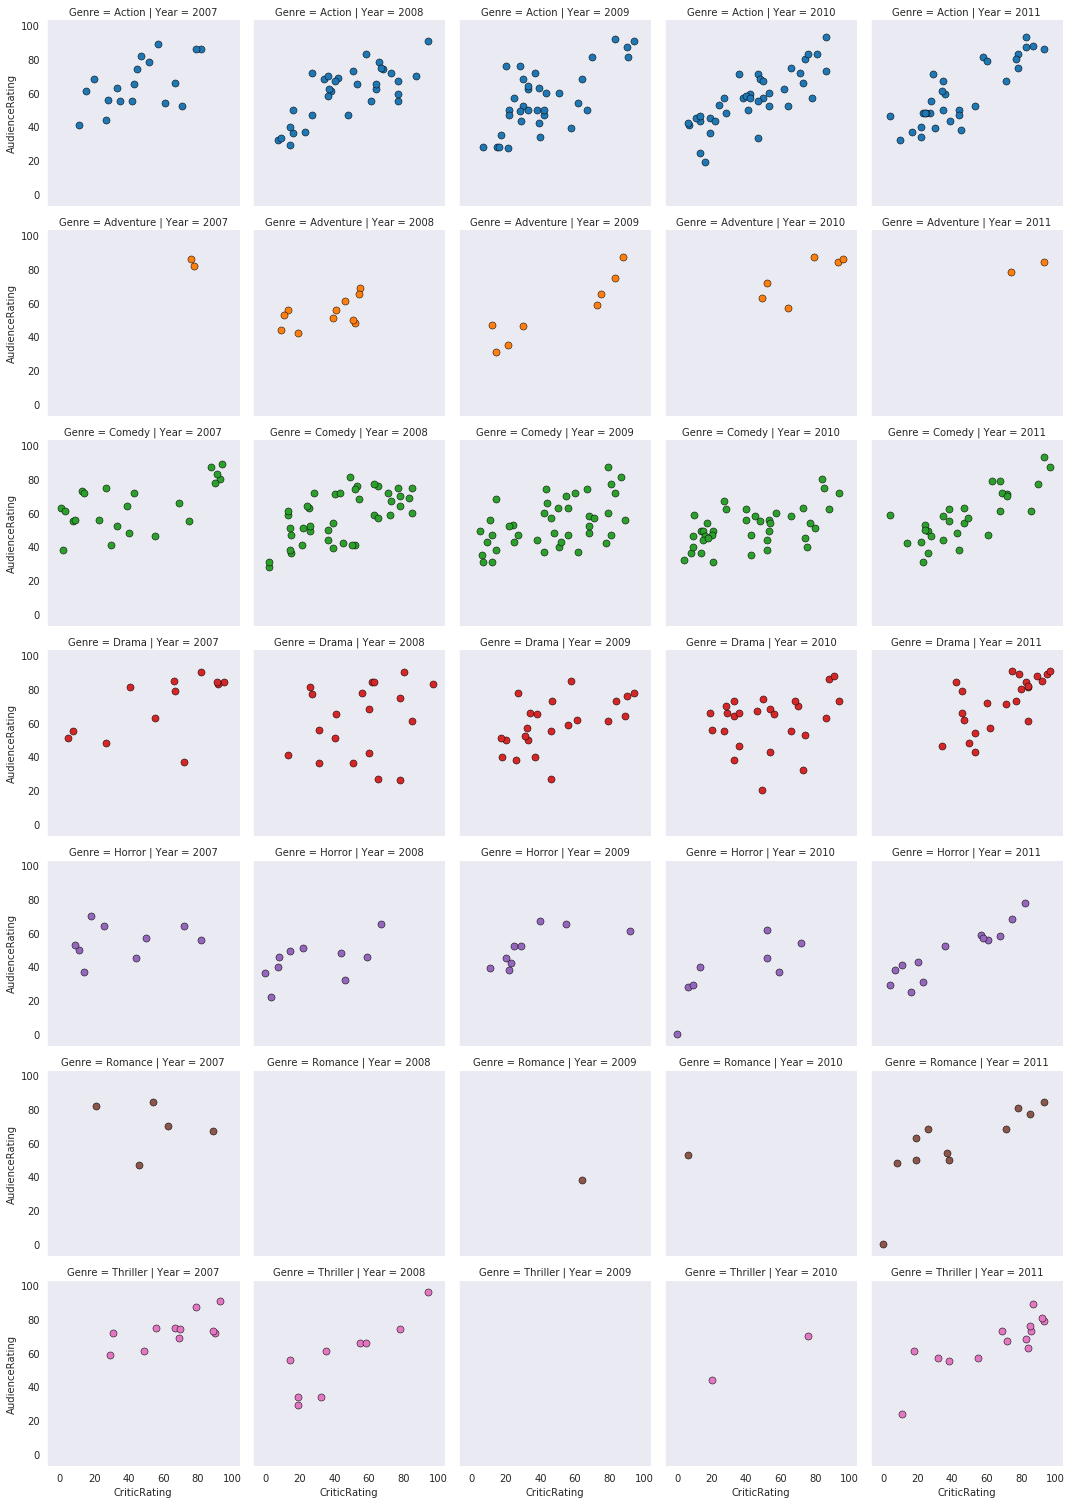

In [95]:
#back to scatterplots
g = sns.FacetGrid(movies,row='Genre',col='Year',hue='Genre')
kws = dict(s=50,linewidth=0.5,edgecolor='black')
g = g.map(plt.scatter,'CriticRating','AudienceRating',**kws)
